In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# fetch dataset 
appliances_energy_prediction = fetch_ucirepo(id=374) 
  
# data (as pandas dataframes) 
X = appliances_energy_prediction.data.features 
y = appliances_energy_prediction.data.targets 
  
# metadata 
print(appliances_energy_prediction.metadata) 
  
# variable information 
print(appliances_energy_prediction.variables)

{'uci_id': 374, 'name': 'Appliances Energy Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction', 'data_url': 'https://archive.ics.uci.edu/static/public/374/data.csv', 'abstract': 'Experimental data used to create regression models of appliances energy use in a low energy building.', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 19735, 'num_features': 28, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Appliances'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2017, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5VC8G', 'creators': ['Luis Candanedo'], 'intro_paper': {'ID': 398, 'type': 'NATIVE', 'title': 'Data driven prediction models of energy use of appliances in a low-energy house', 'authors': 'L. Candanedo, V. Feldheim, Dominique Deramaix', 'venue': 'Energy and Buildings,

In [4]:
# the features and target variables. No missing values and categorical variables in the dataset
data = pd.merge(X, y, left_index=True, right_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [5]:
def split_date_time(x):
    """Split the string into formmated date and time format.

    Args:
        x (_type_): original string to be split
    """
    date = x[:-8]
    time = x[-8:]
    return date + '-' + time
    
# apply the function to the date column
data['date'] = data['date'].apply(split_date_time)
data[:5]

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,2016-01-11-17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,60
1,2016-01-11-17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,60
2,2016-01-11-17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,50
3,2016-01-11-17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390,50
4,2016-01-11-17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,60


In [6]:
# convert the date column to datetime
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d-%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   lights       19735 non-null  int64         
 2   T1           19735 non-null  float64       
 3   RH_1         19735 non-null  float64       
 4   T2           19735 non-null  float64       
 5   RH_2         19735 non-null  float64       
 6   T3           19735 non-null  float64       
 7   RH_3         19735 non-null  float64       
 8   T4           19735 non-null  float64       
 9   RH_4         19735 non-null  float64       
 10  T5           19735 non-null  float64       
 11  RH_5         19735 non-null  float64       
 12  T6           19735 non-null  float64       
 13  RH_6         19735 non-null  float64       
 14  T7           19735 non-null  float64       
 15  RH_7         19735 non-null  float64       
 16  T8  

## Visualize the general trend of the time

The reason we did it here is to show that there is time trend and autocorrelation in the variables.

These relevant time-series problems will not be discussed in the report, but we can not ignore it.

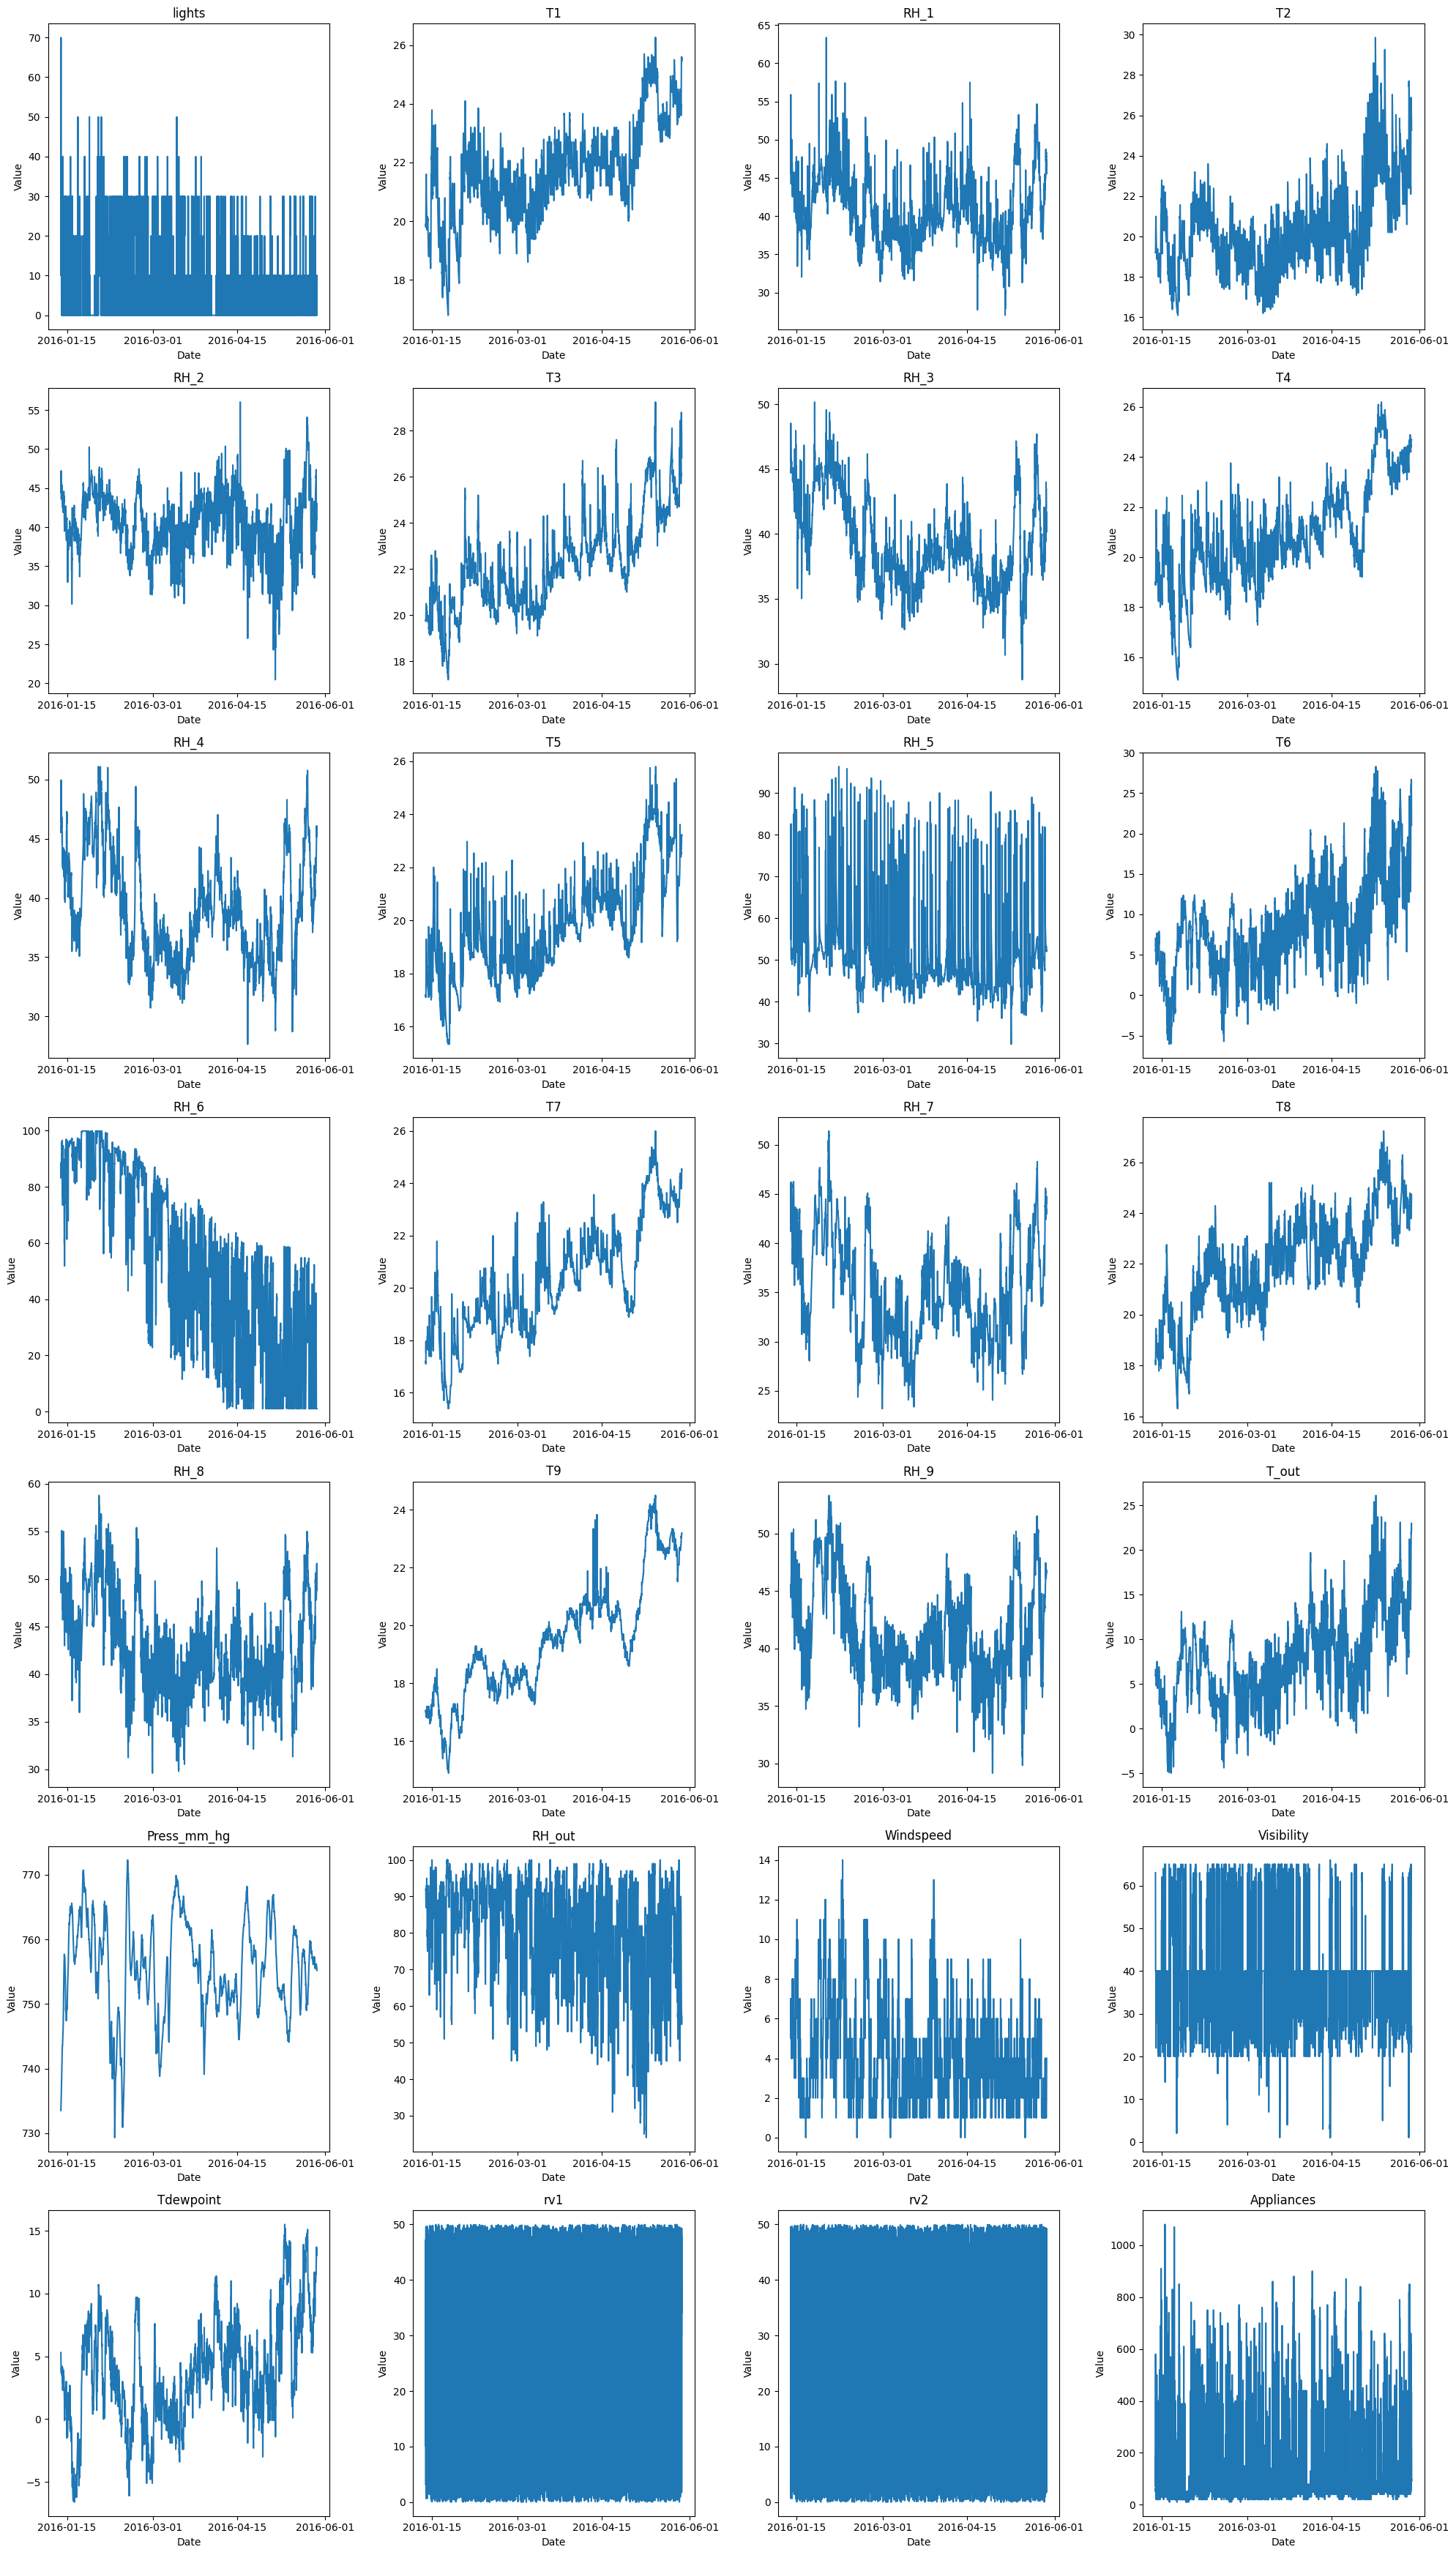

In [7]:
def plot_data(data, date_time = None, x_scale = "month"):
    """
    Plot all variables in the dataset except the 'date' column.

    Args:
        data (pd.DataFrame): The input dataframe with a 'date' column.
    """
    import matplotlib.pyplot as plt

    # Set the number of rows and columns for subplots
    num_vars = len(data.columns) - 1  # Exclude the 'date' column
    num_cols = 4
    num_rows = (num_vars + num_cols - 1) // num_cols  # Calculate rows needed

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    # Plot each variable
    for i, column in enumerate(data.columns):
        i = i - 1
        if column != 'date':  # Exclude the 'date' column
            axes[i].plot(data['date'], data[column])
            axes[i].set_title(column)
            axes[i].set_xlabel('Date')
            axes[i].set_ylabel('Value')
            axes[i].set_xticks(axes[i].get_xticks()[::len(axes[i].get_xticks()) // 3])
            # if x_scale == "day", set pure numbers for x-axis

    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the function
plot_data(data)

In [8]:
def select_multiple_days(data, days):
    """
    Select rows from the dataframe that match the specified days.

    Args:
        data (pd.DataFrame): The input dataframe with a 'date' column.
        days (list): List of days (in 'YYYY-MM-DD' format) to filter.

    Returns:
        pd.DataFrame: Filtered dataframe containing only the specified days.
    """
    return data[data['date'].dt.strftime('%Y-%m-%d').isin(days)]

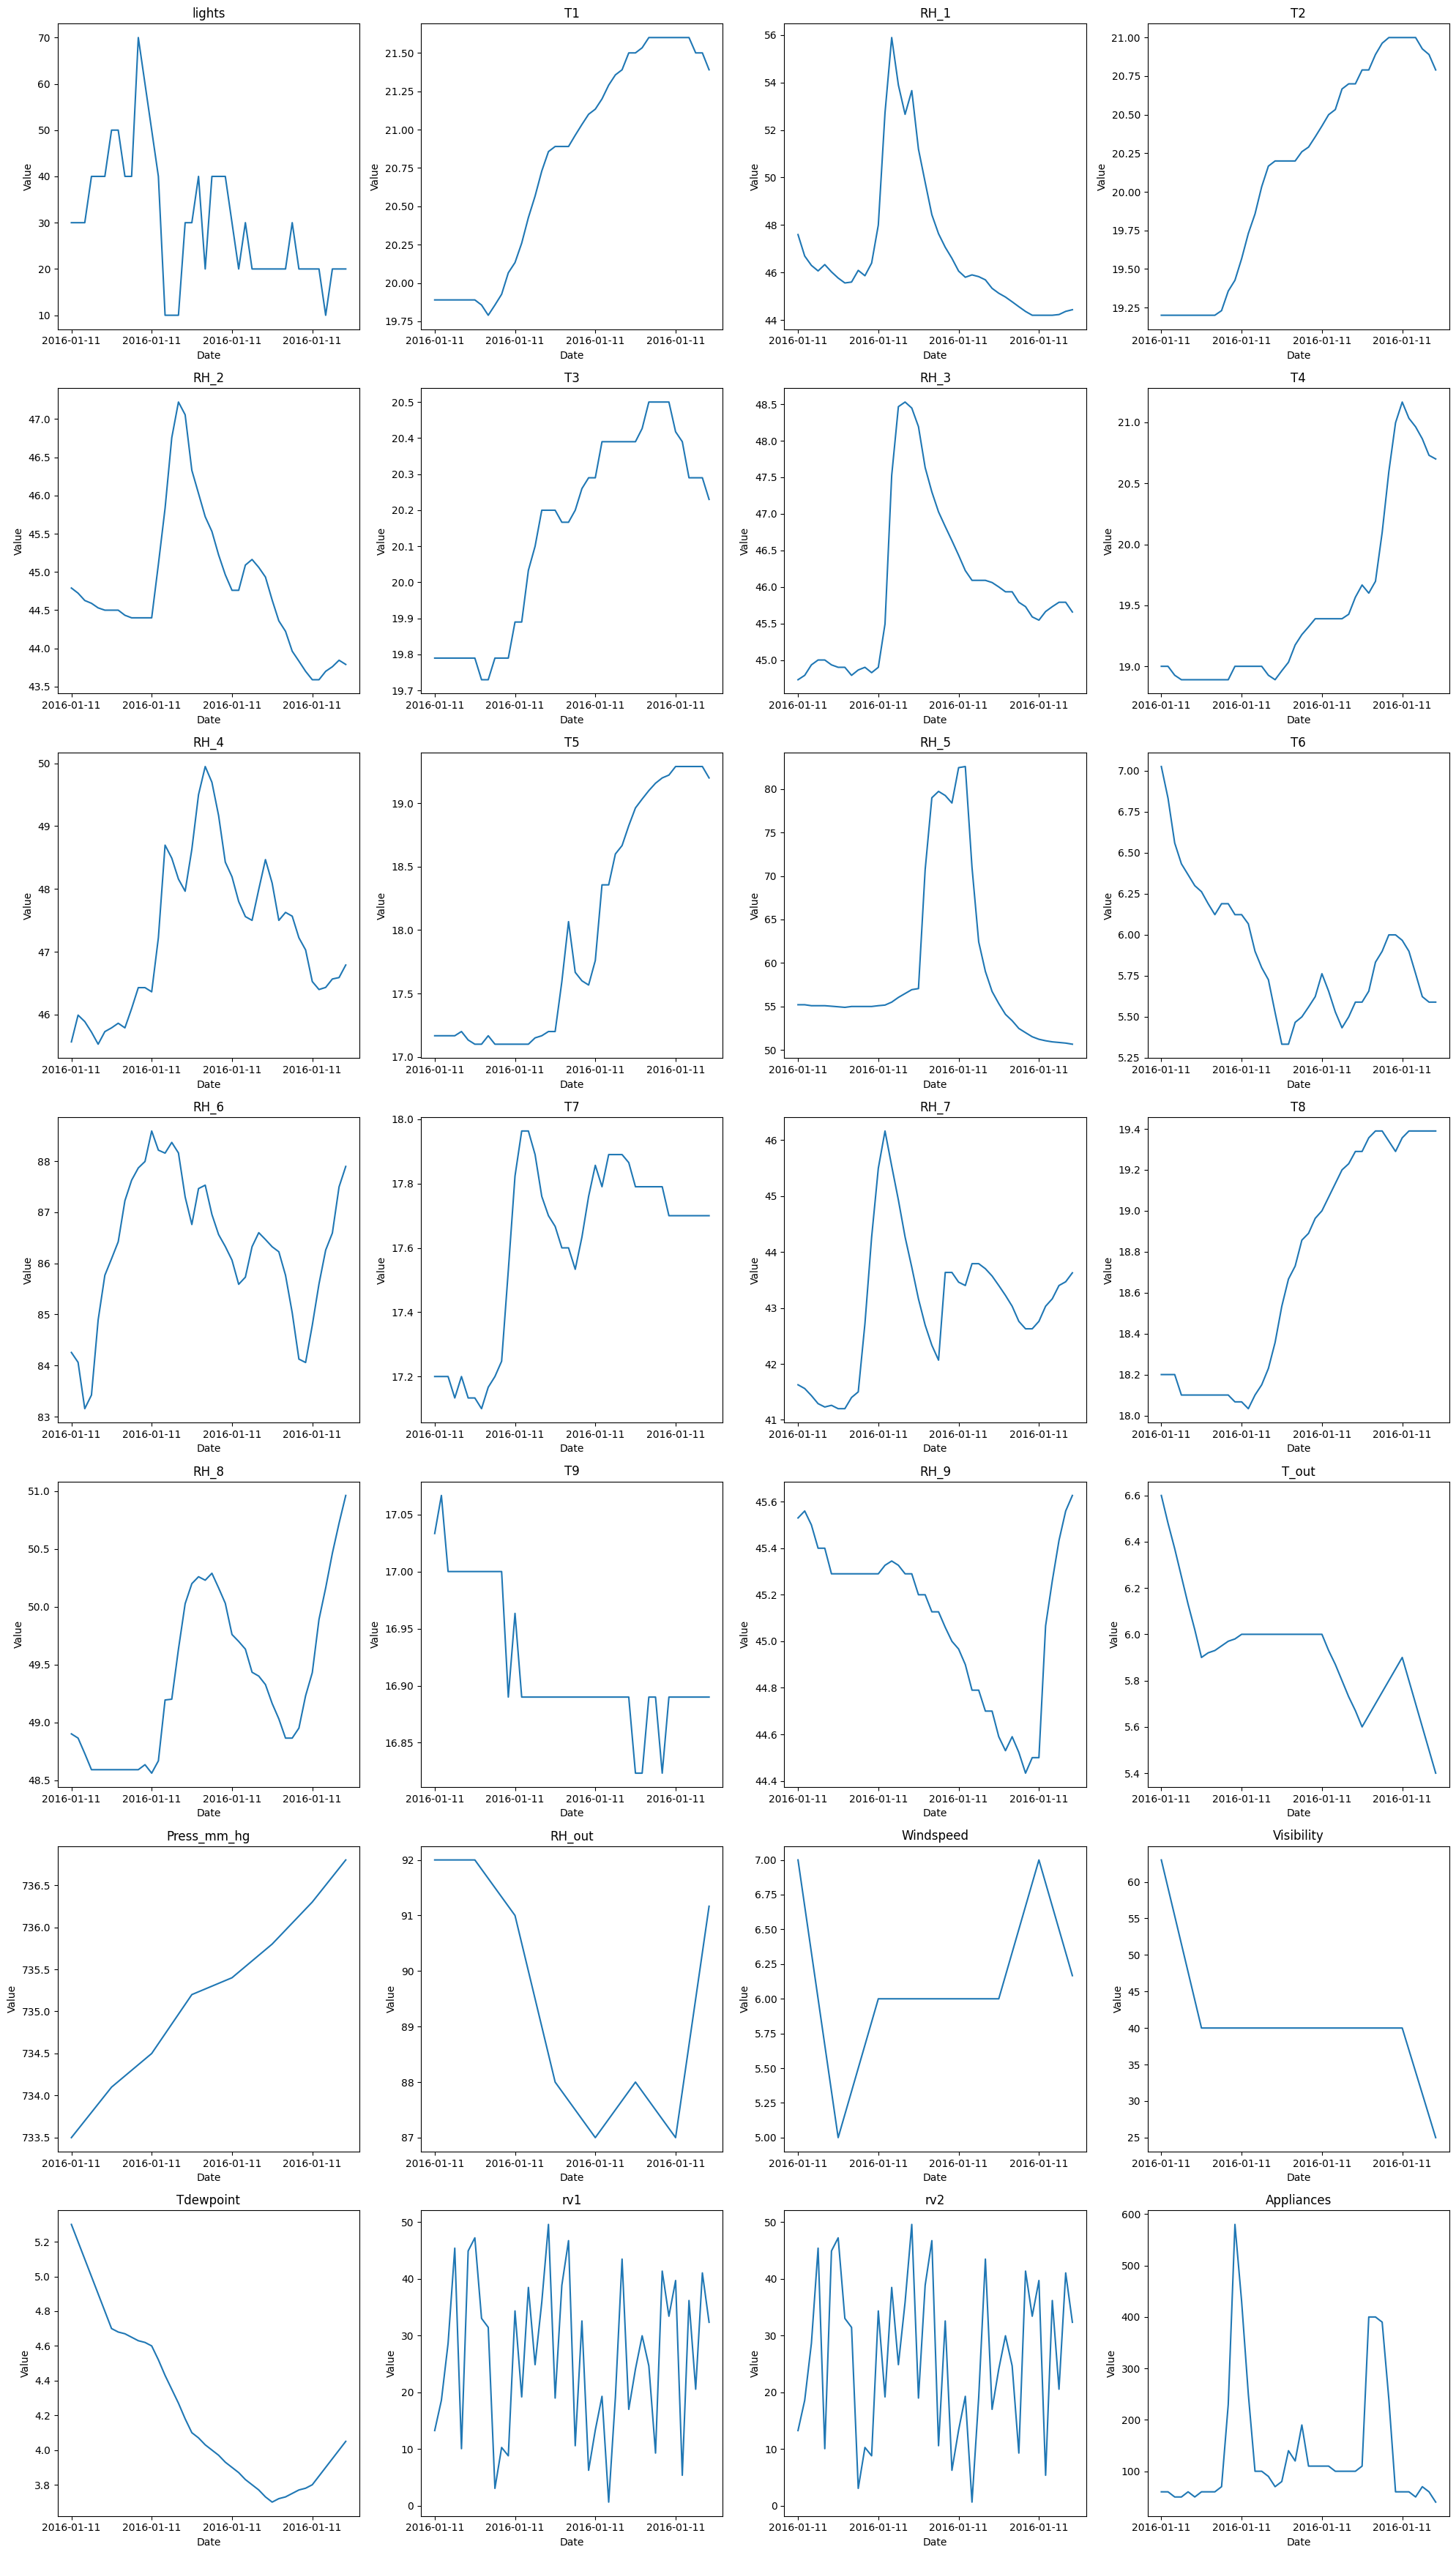

In [9]:
# visualize the daily data to check the trend
specific_days = ['2016-01-11']
def f():
    # select the middle days data
    middle_days_data = select_multiple_days(data, specific_days)
    # visualize the data
    plot_data(middle_days_data)
f()

# Check the common statistics about these variables and detect outliers

In [10]:
from scipy.stats import kurtosis, shapiro, skew
import seaborn as sns

Check the skewness of these vairables. If some variables are extreme skewed and not strong correlated with the target variable, we drop it off.

- If abs(skewness) > 1, we think it is skewness
- If linear correlation < 0.05, we think it is extremely low correlated with the target variable.

In [11]:
def distribution_stats(data):
    """Calculate summary statistics, skewness, kurtosis, and Shapiro-Wilk normality test for numerical variables.
    
    Args:
        data (pd.DataFrame): A pandas dataframe with numerical variables.
    
    Returns:
        pd.DataFrame: Summary statistics including mean, std, skewness, kurtosis, and Shapiro-Wilk test results.
    """
    
    # Standard descriptive statistics
    common_stats = data.describe()
    
    # Compute Skewness
    skewness = data.select_dtypes(include="number").skew()
    skewness.name = "skewness"
    
    # Compute Kurtosis
    kurt = data.select_dtypes(include="number").apply(lambda x: kurtosis(x, nan_policy='omit', fisher=True))  # Fisher=True gives excess kurtosis
    kurt.name = "kurtosis"
    
    # Compute Shapiro-Wilk Test (Test for normality)
    shapiro_results = data.select_dtypes(include="number").apply(lambda x: shapiro(x.dropna())[1])  # Extract p-value
    shapiro_results.name = "shapiro_p_value"
    
    # Convert series to DataFrame and format
    skewness = pd.DataFrame(skewness).T
    kurt = pd.DataFrame(kurt).T
    shapiro_results = pd.DataFrame(shapiro_results).T
    
    # Concatenate all results together
    result = pd.concat([common_stats, skewness, kurt, shapiro_results], axis=0)
    
    # check the skewness of the numerical variables
    if abs(result.loc["skewness", :]).max() > 1:
        print("There is at least one variable that is highly skewed")
    else:
        print("There is no variable that is highly skewed")
        
    # check the kurtosis of the numerical variables
    if result.loc["kurtosis", :].max() > 3:
        print("There is at least one variable that has more outliers")
    elif result.loc["kurtosis", :].max() < -3:
        print("There is at least one variable that has fewer outliers")
    else:
        print("There is no variable that has more or fewer outliers")
        
    # check the normality of the numerical variables
    if result.loc["shapiro_p_value", :].max() < 0.05:
        print("There is no vairable that is normally distributed")
    else:
        print("There is at least one variable that is normally distributed")
    
    return result

In [12]:
distribution_stats(data)

There is at least one variable that is highly skewed
There is at least one variable that has more outliers
There is no vairable that is normally distributed


/Users/gufeng/ENTER/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
count,19735,19735.000000,1.973500e+04,1.973500e+04,19735.000000,1.973500e+04,1.973500e+04,19735.000000,1.973500e+04,19735.000000,...,19735.000000,1.973500e+04,1.973500e+04,19735.000000,19735.000000,19735.000000,1.973500e+04,19735.000000,19735.000000,19735.000000
mean,2016-03-20 05:30:00,3.801875,2.168657e+01,4.025974e+01,20.341219,4.042042e+01,2.226761e+01,39.242500,2.085533e+01,39.026904,...,41.552401,7.412580e+00,7.555226e+02,79.750418,4.039752,38.330834,3.760995e+00,24.988033,24.988033,97.694958
min,2016-01-11 17:00:00,0.000000,1.679000e+01,2.702333e+01,16.100000,2.046333e+01,1.720000e+01,28.766667,1.510000e+01,27.660000,...,29.166667,-5.000000e+00,7.293000e+02,24.000000,0.000000,1.000000,-6.600000e+00,0.005322,0.005322,10.000000
25%,2016-02-14 23:15:00,0.000000,2.076000e+01,3.733333e+01,18.790000,3.790000e+01,2.079000e+01,36.900000,1.953000e+01,35.530000,...,38.500000,3.670000e+00,7.509333e+02,70.333333,2.000000,29.000000,9.000000e-01,12.497889,12.497889,50.000000
50%,2016-03-20 05:30:00,0.000000,2.160000e+01,3.965667e+01,20.000000,4.050000e+01,2.210000e+01,38.530000,2.066667e+01,38.400000,...,40.900000,6.920000e+00,7.561000e+02,83.666667,3.666667,40.000000,3.430000e+00,24.897653,24.897653,60.000000
75%,2016-04-23 11:45:00,0.000000,2.260000e+01,4.306667e+01,21.500000,4.326000e+01,2.329000e+01,41.760000,2.210000e+01,42.156667,...,44.338095,1.040000e+01,7.609333e+02,91.666667,5.500000,40.000000,6.570000e+00,37.583769,37.583769,100.000000
max,2016-05-27 18:00:00,70.000000,2.626000e+01,6.336000e+01,29.856667,5.602667e+01,2.923600e+01,50.163333,2.620000e+01,51.090000,...,53.326667,2.610000e+01,7.723000e+02,100.000000,14.000000,66.000000,1.550000e+01,49.996530,49.996530,1080.000000
std,NaN,7.935988,1.606066e+00,3.979299e+00,2.192974,4.069813e+00,2.006111e+00,3.254576,2.042884e+00,4.341321,...,4.151497,5.318464e+00,7.399441e+00,14.901088,2.451221,11.794719,4.195248e+00,14.496634,14.496634,102.524891
skewness,NaN,2.195155,1.209171e-01,4.657738e-01,0.889658,-2.682472e-01,4.507773e-01,0.467589,1.703841e-01,0.444614,...,0.368937,5.343016e-01,-4.204415e-01,-0.922997,0.859982,0.441554,2.399745e-01,0.004945,0.004945,3.386367
kurtosis,NaN,4.460712,1.612563e-01,1.122962e-01,0.932856,6.704854e-01,-7.357478e-03,-0.583282,-3.792769e-02,-0.614115,...,-0.405741,3.628874e-01,7.150867e-02,0.256490,0.249662,0.165472,-1.238727e-01,-1.205695,-1.205695,13.664097


lights        0.197278
RH_5          0.006955
Appliances    1.000000
Name: Appliances, dtype: float64

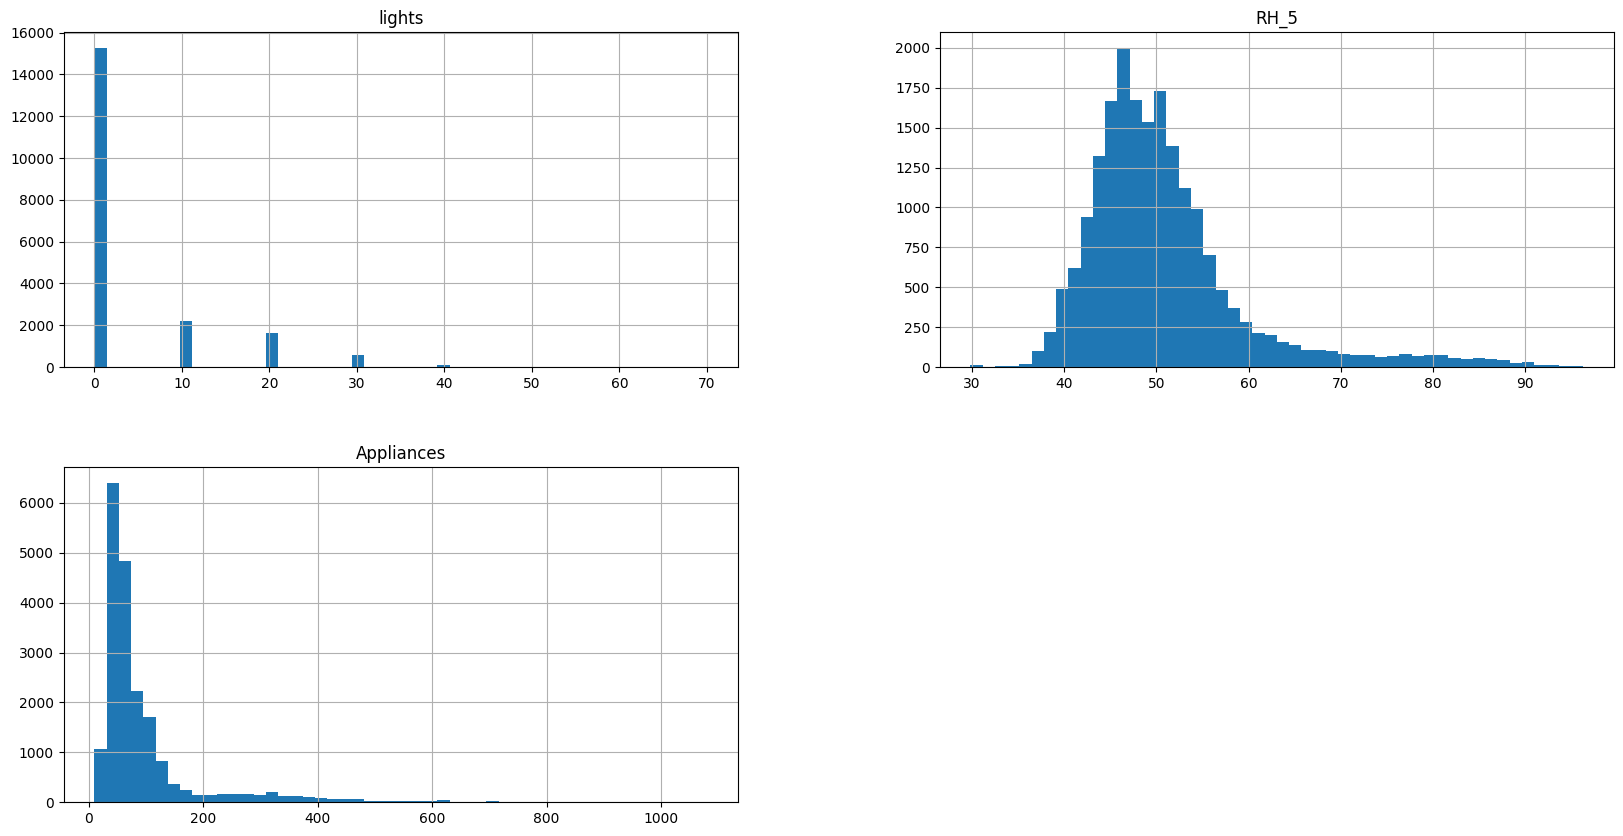

In [13]:
# check the variables with high skewness
skewness = data.select_dtypes(include="number").skew()
skewness = pd.DataFrame(skewness)
# select the varialbes with skewness > 1
skewness = skewness[skewness.map(lambda x: abs(x)> 1).values]
# visualize the distributions of these variables
skewness_variables = data[skewness.index]
skewness_variables.hist(figsize=(20, 10), bins=50)
# calculate the correlation of these skewness variables with the target variable - Applicance energy
correlation = skewness_variables.corr()['Appliances']
correlation

In [14]:
def numerical_correlation(data):
    """Calculate the correlation matrix for numerical variables.
    
    Args:
        data (pd.DataFrame): A pandas dataframe with numerical variables.
    
    Returns:
        pd.DataFrame: A correlation matrix.
    """
    
    # check the correlation coefficients among the numerical variables
    raw_corr_matrix = data.select_dtypes(include="number").corr()

    # Define a function to style cells
    def highlight_threshold(val, threshold = None):
        """
        Highlight values above a threshold in red.
        """
        if abs(val) > 0.9:
            color = 'background-color: red' 
        elif abs(val) > 0.8:
            color = 'background-color: orange'
        elif abs(val) > 0.7:
            color = 'background-color: yellow'
        elif abs(val) > 0.5:
            color = 'background-color: green' 
        else:
            color = ""
        return color
        
    # Apply the style to the correlation matrix and show
    return raw_corr_matrix.style.applymap(
        lambda val: highlight_threshold(val)
    )

In [15]:
numerical_correlation(data)

/var/folders/s5/r1s56_ps46lbbv1370hjn_vr0000gn/T/ipykernel_33236/552984752.py:32: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return raw_corr_matrix.style.applymap(


,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
lights,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,0.141233,-0.079029,0.153756,-0.135347,0.035069,-0.071458,0.012915,-0.157592,-0.008766,-0.074423,-0.010576,0.068543,0.060281,0.020038,-0.036331,0.000521,0.000521,0.197278
T1,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682854,-0.150574,-0.345481,-0.087654,-0.076210,0.571333,-0.006203,-0.006203,0.055447
RH_1,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340788,-0.293957,0.274126,0.204932,-0.021057,0.639125,-0.000699,-0.000699,0.086031
T2,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792247,-0.133028,-0.505291,0.052495,-0.069721,0.582632,-0.011087,-0.011087,0.120073
RH_2,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033703,-0.255646,0.584911,0.069190,-0.005368,0.499154,0.006275,0.006275,-0.060465
T3,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699420,-0.189974,-0.281718,-0.100776,-0.102310,0.645909,-0.005194,-0.005194,0.085060
RH_3,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118237,-0.233274,0.356192,0.263188,0.017041,0.414398,-0.000477,-0.000477,0.036292
T4,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663479,-0.075292,-0.388602,-0.185747,-0.104768,0.519504,-0.001815,-0.001815,0.040281
RH_4,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293307,-0.250748,0.336813,0.300192,0.002636,0.616508,-0.001787,-0.001787,0.016965
T5,-0.078745,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,0.032786,0.629161,-0.632384,0.870624,0.148905,0.824981,0.016388,0.911055,0.072308,0.651335,-0.170999,-0.273953,-0.145011,-0.084164,0.588393,-0.005490,-0.005490,0.019760


<span style = "color: green">

After checking the skewness and correlation, we do the following droping off and transformation:

- Drop off the variable RH5.
- Do logrithm transformation on lights and Appliances variables.

In [16]:
import numpy as np

In [17]:
# Update the data
# 1. Drop the 'RH_5' column
data = data.drop(columns = ['RH_5'])
# 2. Log-transform the lights and Appliances columns
data['lights'] = data['lights'].apply(lambda x: 0 if x == 0 else np.log(x))
data['Appliances'] = data['Appliances'].apply(lambda x: 0 if x == 0 else np.log(x))
data[:5]

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,2016-01-11 17:00:00,3.401197,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,4.094345
1,2016-01-11 17:10:00,3.401197,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,4.094345
2,2016-01-11 17:20:00,3.401197,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,3.912023
3,2016-01-11 17:30:00,3.688879,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390,3.912023
4,2016-01-11 17:40:00,3.688879,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,4.094345


array([[<Axes: title={'center': 'lights'}>,
        <Axes: title={'center': 'Appliances'}>]], dtype=object)

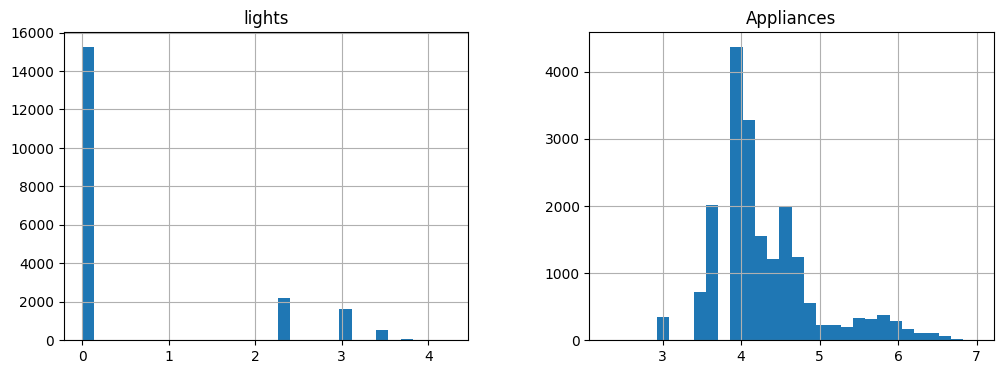

In [18]:
# check the two transformed variables
data[['lights', 'Appliances']].hist(figsize=(12, 4), bins=30)

After transformation, the lights still have some extreme outliers, let us check it and decide if drop off the outliers.

- Check the subset when lights is greater than 3.5, especially the correlation between lights and Appliances.
  
  If the distribution is not unusual and the correlation is low, we drop out these observations with extreme lights values.

              lights  Appliances
lights      1.000000    0.089502
Appliances  0.089502    1.000000


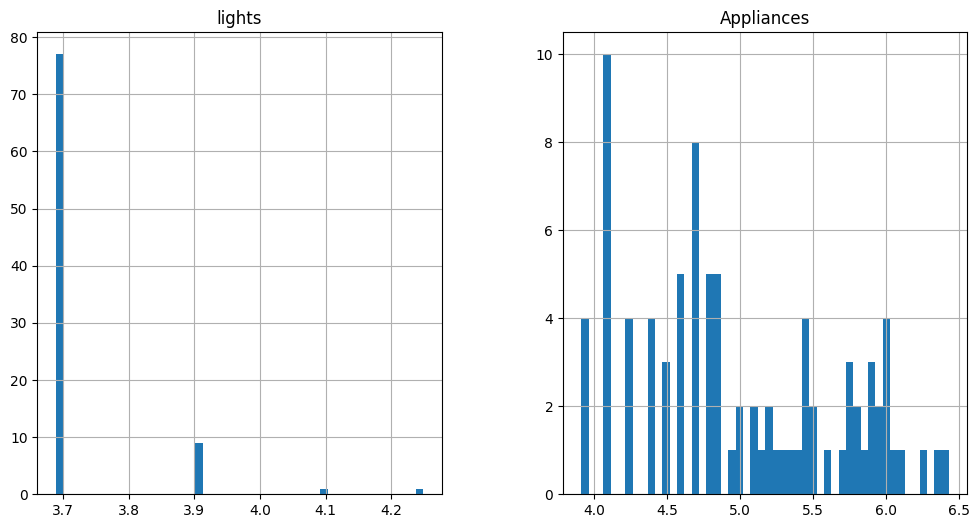

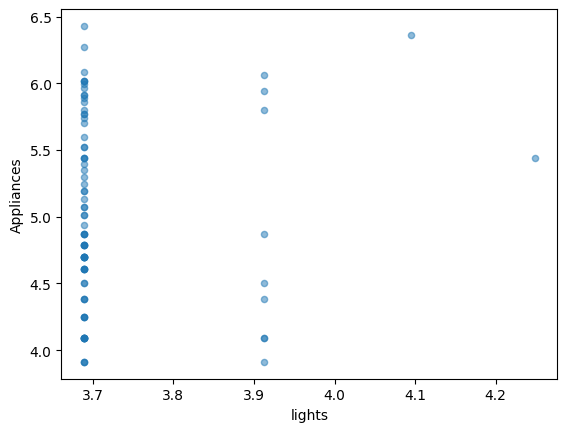

In [19]:
def _check_extreme_lights():
    subset = data[data["lights"] > 3.5]
    subset = subset[['lights', 'Appliances']]
    subset.hist(figsize=(12, 6), bins=50)
    subset.plot(x = 'lights', y = 'Appliances', kind = 'scatter', alpha = 0.5)
    print(subset.corr())
_check_extreme_lights()

<span style = "color: green">

After observing the distribution within the subset of extreme lights values, we decide to drop off these observations with unnormal lights values.
<span>

In [20]:
# Update the data by removing the extreme values
print(f"Before removing extreme values, the data has rows: {data.shape}")
data = data[data["lights"] < 3.5]
print(f"After removing extreme values, the data has rows: {data.shape}")

Before removing extreme values, the data has rows: (19735, 28)
After removing extreme values, the data has rows: (19647, 28)


# Create dummy variables

Even though we do not care about time-series related problems in our report, we can use time as an individual 
predictor in our model.

Here, we reckon the influence of the time can be measured by the average influence on the intercept within the corresponding month.

<span style = "color: red"> It means we create dummy variables for each month, using additive pattern to include their influence.<span>

In [21]:
# create dummy variables for each month
def create_month_dummies(data):
    """
    Create dummy variables for each month in the 'date' column.
    
    Args:
        data (pd.DataFrame): The input dataframe with a 'date' column.
    
    Returns:
        pd.DataFrame: Dataframe with dummy variables for each month.
    """
    # Extract month from the date column
    data['month'] = data['date'].dt.month
    
    # Create dummy variables for each month
    month_dummies = pd.get_dummies(data['month'], prefix='month', drop_first=True)
    
    # Concatenate the dummy variables with the original dataframe
    data_with_dummies = pd.concat([data, month_dummies], axis=1)
    
    return data_with_dummies

In [22]:
# update the data, adding the month dummies
data = create_month_dummies(data)
data['month'].value_counts(normalize=True)

month
3    0.226650
4    0.219881
2    0.210923
5    0.196111
1    0.146435
Name: proportion, dtype: float64

In [24]:
# store this filtered data to local
data.to_csv("../data/filtered_original_data.csv", index = False)

# What to do next?

- Split train and test data sets.

- Use Lasso/Ridge method to filter features, make sure the amount of predictor used in our model is no more than 10.

- Using the selected predictors to do regression with Appliances.

    Think about what kinds of regression can be use, **classical linear regression, regression splines can be compared and chosen from.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# define the function for splitting the train and test data
def split_train_test(data, test_size = 0.2):
    """
    Split the data into training and testing sets.
    
    Args:
        data (pd.DataFrame): The input dataframe to be split.
        test_size (float): Proportion of the dataset to include in the test split.
    
    Returns:
        tuple: Training and testing dataframes.
    """
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=42)
    train_data.to_csv("../data/train_data.csv", index = False)
    test_data.to_csv("../data/test_data.csv", index = False)
    print(f"Train data shape: {train_data.shape}, has been saved to ../data/train_data.csv")
    print(f"Test data shape: {test_data.shape}, has been saved to ../data/test_data.csv")
    return train_data, test_data

In [ ]:
# split and store the data
# train_data, test_data = split_train_test(data)

Train data shape: (15717, 33), has been saved to ../data/train_data.csv
Test data shape: (3930, 33), has been saved to ../data/test_data.csv


## Build models on training data from this point

Change the default data used in the environment to the train_data

In [1]:
# Use Lasso Regression to select the features
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

In [2]:
# update the data
data = pd.read_csv("../data/train_data.csv").drop("date", axis = 1) # do not concern the date variable
data[:5]

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Visibility,Tdewpoint,rv1,rv2,Appliances,month,month_2,month_3,month_4,month_5
0,0.000000,22.600000,41.000000,19.566667,45.626667,24.230000,38.73,21.100000,41.200000,20.890000,...,37.666667,5.520,11.685609,11.685609,3.912023,4,False,False,True,False
1,0.000000,21.700000,38.730000,18.100000,43.290000,22.390000,37.40,22.671429,36.668571,20.390000,...,24.666667,0.667,7.731782,7.731782,4.094345,4,False,False,True,False
2,0.000000,21.890000,35.400000,19.323333,37.466667,20.730000,36.29,20.426667,34.090000,18.963333,...,22.666667,1.330,22.067960,22.067960,4.787492,3,False,True,False,False
3,2.995732,20.790000,36.826667,19.426667,37.230000,20.790000,37.00,19.000000,36.133333,17.500000,...,40.000000,-0.850,33.644583,33.644583,5.669881,2,True,False,False,False
4,2.302585,17.666667,44.693333,17.000000,43.363333,18.323333,44.36,17.996667,45.360000,15.390000,...,48.000000,5.700,16.087345,16.087345,6.536692,1,False,False,False,False


# Use Lasso method to filter features

**Why we use Lasso method instead of Ridge to select important features?**

- After checking the correlation matrix of features, we found there are some features highly correlated.
    
    This makes Ridge assign closely eqaul weight to the two features, which does not provide the function of disbanding useless features.

    But Lasso will keep only one of them and drop the other one, which achieves the fucntion of reducing dimension of column in design matrix.

In [3]:
# check the data, take out the features that do not need to be sandardized
# data.info()
# features that do not need to be standardized
qualitative_features = ["date", "month", "month_2", "month_3", "month_4", "month_5"]
print(f"The qualitative features are\n: {qualitative_features}")
# features that need to be standardized
quantitative_features = data.columns.difference(qualitative_features)
print(f"The quantitative features are\n: {quantitative_features}")

The qualitative features are
: ['date', 'month', 'month_2', 'month_3', 'month_4', 'month_5']
The quantitative features are
: Index(['Appliances', 'Press_mm_hg', 'RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_6',
       'RH_7', 'RH_8', 'RH_9', 'RH_out', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6',
       'T7', 'T8', 'T9', 'T_out', 'Tdewpoint', 'Visibility', 'Windspeed',
       'lights', 'rv1', 'rv2'],
      dtype='object')


In [13]:
def f():
    alphas = np.linspace(0.00001, 0.23, 50)
    coefs = []

    X = data[quantitative_features].drop(columns=["Appliances"])
    y = data[quantitative_features]["Appliances"]
    y = StandardScaler().fit_transform(y.values.reshape(-1, 1)).flatten()
    
    for alpha in alphas:
        model = make_pipeline(StandardScaler(), Lasso(alpha=alpha, max_iter=100))
        model.fit(X, y)
        # Access the Lasso step and get coefficients
        coefs.append(model.named_steps['lasso'].coef_)

    coef_df = pd.DataFrame(coefs, columns=X.columns, index=alphas)
    coef_df.index.name = "alpha"
    
    return coef_df
coef_df = f()

/Users/gufeng/ENTER/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.651e+03, tolerance: 1.572e+00
  model = cd_fast.enet_coordinate_descent(
/Users/gufeng/ENTER/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.036e+01, tolerance: 1.572e+00
  model = cd_fast.enet_coordinate_descent(


In [18]:
coef_df.shape

(50, 26)

In [40]:
(26) % 7

5

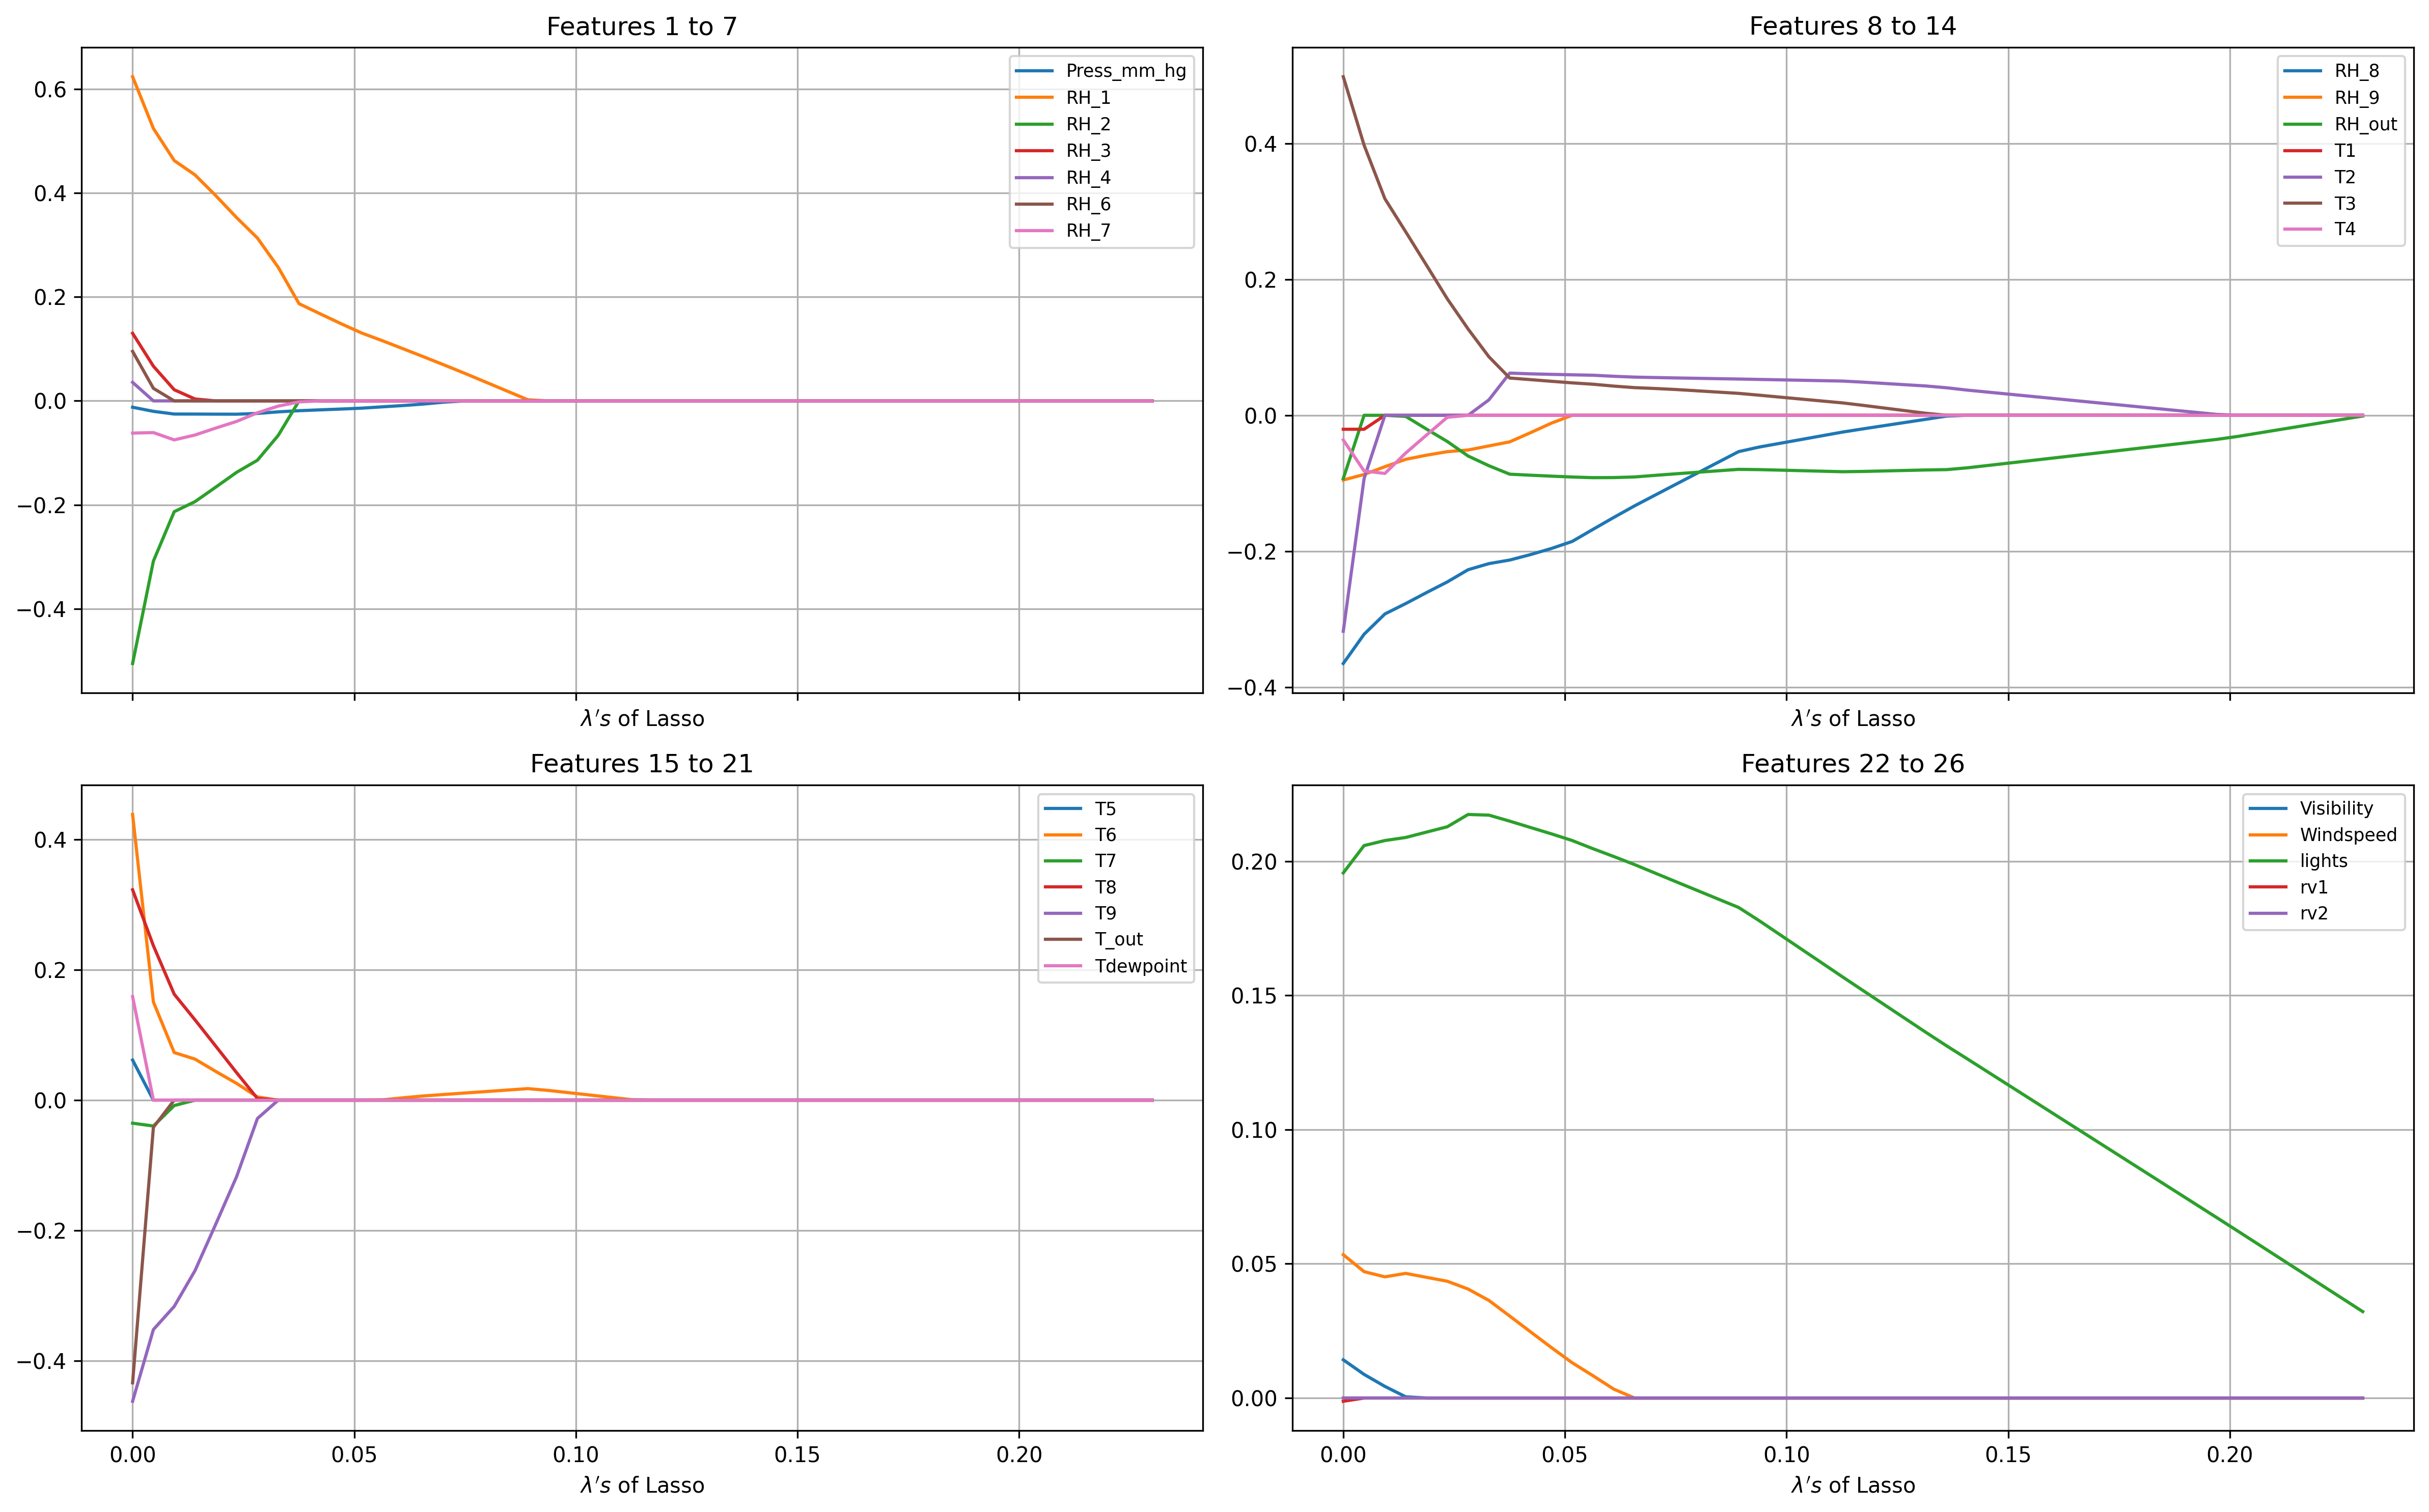

In [43]:
import matplotlib.pyplot as plt

def plot_features_by_index(df):
    features = df.columns
    n_features = len(features)
    n_cols_per_plot = 7  # Number of features per subplot
    n_subplots = (n_features + n_cols_per_plot - 1) // n_cols_per_plot  # Should be 4

    # Set up 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True, dpi = 300)
    axes = axes.flatten()

    for i in range(n_subplots):
        start = i * n_cols_per_plot
        end = min((i + 1) * n_cols_per_plot, n_features)
        subset_features = features[start:end]

        for feature in subset_features:
            axes[i].plot(df.index, df[feature], label=feature)

        axes[i].set_title(f"Features {start + 1} to {end}")
        axes[i].legend(loc="upper right", fontsize='small')
        axes[i].grid(True)
        axes[i].set_xlabel("$\lambda's$ of Lasso")

    # Hide any unused axes (in case total subplots < 4)
    for j in range(n_subplots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage:
plot_features_by_index(coef_df)

## How to use this Lasso regression to select features?

We modulize this function and make it ready to be used in the model fitting process.

- Enclose it as a function that we can envoke any time to select features.
  
- Loop it with different lambdas(*maximize 20*) to provide different filtered feature combinations.
  
- Try these different combinations in regression model. Use cross-validation to compare which combination provides us smallest test-MSE, test-MAE ...
